In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

If the below cell gives error in `tz_localize`, use `tz_convert` as Pandas is time zone aware. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava.head()
#strava

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()
#cheetah

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and we won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [4]:
#Inner Join strava and cheetah
strava_n_cheetah = strava.join(cheetah, how="inner")
strava_n_cheetah

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-27 21:47:24+00:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides

In [5]:
#Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
strava_n_cheetah = strava_n_cheetah.drop(strava_n_cheetah.index[strava_n_cheetah.device_watts != True])

#create SC_date(formate yyyy-mm-dd) from index of strava_n_cheetah
strava_n_cheetah['Date'] = strava_n_cheetah.index
strava_n_cheetah['SC_Date'] = strava_n_cheetah['Date'].dt.date
strava_n_cheetah['SC_Date'] = pd.to_datetime(strava_n_cheetah.SC_Date, format='%Y-%m-%d')

#drop temp column 'Date'
drop_cols = ['Date']
strava_n_cheetah.drop(drop_cols, axis = 1, inplace = True)

#strava_n_cheetah['device_watts'].unique()
#strava_n_cheetah.dtypes

strava_n_cheetah['SC_Date'] 


2018-01-27 19:39:49+00:00   2018-01-27
2018-01-27 20:01:32+00:00   2018-01-27
2018-02-05 21:06:42+00:00   2018-02-05
2018-02-07 06:59:05+00:00   2018-02-07
2018-02-09 19:18:03+00:00   2018-02-09
                               ...    
2019-07-19 20:22:49+00:00   2019-07-19
2019-07-26 20:12:56+00:00   2019-07-26
2019-07-27 20:42:59+00:00   2019-07-27
2019-07-27 21:47:24+00:00   2019-07-27
2019-07-27 23:55:13+00:00   2019-07-27
Name: SC_Date, Length: 205, dtype: datetime64[ns]

In [7]:
# data frame 'strava_n_cheetah' after removing device_watts is False
strava_n_cheetah

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS,SC_Date
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,222.856,0.831550,20.2257,2018-01-27
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,245.365,0.915540,94.5787,2018-01-27
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,253.702,0.946650,98.3269,2018-02-05
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,232.644,0.868080,171.0780,2018-02-07
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,212.726,0.793750,147.7970,2018-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,222.988,0.832045,159.3630,2019-07-19
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,236.028,0.880701,183.1140,2019-07-26
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,212.020,0.791118,51.1646,2019-07-27
2019-07-27 21:47:24+00:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,267.699,0.998877,83.5620,2019-07-27


In [8]:
#Select only interesting columns from strava_n_cheetah to create a samller data fram 'strava_cheetah'
cols = ['SC_Date','elapsed_time', 'Duration', 'moving_time', 'Time Moving', 'Elevation Gain', 'Average Speed',
         'average_watts', 'Average Power', 'Nonzero Average Power', 'NP', 'average_heartrate', 'Average Heart Rate',
         'Average Cadence','average_temp', 'Average Temp', 'VAM', 'Calories (HR)', '1 sec Peak Power', '1 min Peak Hr',
         'TSS', 'device_watts', 'distance', 'kudos', 'workout_type','elevation_gain']

strava_cheetah = strava_n_cheetah[cols]


In [110]:
#Check data type
#strava_cheetah.dtypes

In [9]:
#Check df descriptive statistics
strava_cheetah.describe()
strava_cheetah

,SC_Date,elapsed_time,Duration,moving_time,Time Moving,Elevation Gain,Average Speed,average_watts,Average Power,Nonzero Average Power,...,VAM,Calories (HR),1 sec Peak Power,1 min Peak Hr,TSS,device_watts,distance,kudos,workout_type,elevation_gain
2018-01-27 19:39:49+00:00,2018-01-27,17,1053,17,1053,77.80,26.0234,153.4,153.283,191.923,...,265.983,201.970,664,143.000,20.2257,True,7.6,4,Ride,95.00 m
2018-01-27 20:01:32+00:00,2018-01-27,67,4062,67,4062,362.20,34.4380,187.7,186.599,231.369,...,321.004,1044.550,766,166.233,94.5787,True,38.6,19,Race,449.00 m
2018-02-05 21:06:42+00:00,2018-02-05,69,4151,65,3945,355.80,22.2417,165.9,163.264,225.094,...,308.571,743.167,846,161.117,98.3269,True,24.3,6,Ride,439.00 m
2018-02-07 06:59:05+00:00,2018-02-07,144,8659,134,8159,815.40,20.7841,151.0,148.253,204.398,...,339.005,1655.090,786,206.826,171.0780,True,47.1,10,Ride,890.00 m
2018-02-09 19:18:03+00:00,2018-02-09,193,11637,139,8415,513.20,25.6585,145.9,143.918,189.786,...,158.763,1659.260,784,164.617,147.7970,True,59.8,22,Ride,656.00 m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,2019-07-19,174,10472,136,8229,500.40,25.4524,166.8,164.740,206.130,...,172.024,0.000,659,0.000,159.3630,True,58.2,16,Ride,666.00 m
2019-07-26 20:12:56+00:00,2019-07-26,185,11150,139,8410,482.63,25.5036,166.9,163.695,201.309,...,155.827,1613.940,894,162.817,183.1140,True,59.6,15,Ride,663.00 m
2019-07-27 20:42:59+00:00,2019-07-27,49,2977,47,2931,157.88,24.3316,168.4,162.109,211.475,...,190.920,573.058,703,138.783,51.1646,True,19.8,6,Ride,247.00 m
2019-07-27 21:47:24+00:00,2019-07-27,50,3015,50,3015,292.20,34.8044,235.2,235.153,262.684,...,348.896,761.681,755,164.567,83.5620,True,29.1,15,Race,415.00 m


### Question 1:
Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 

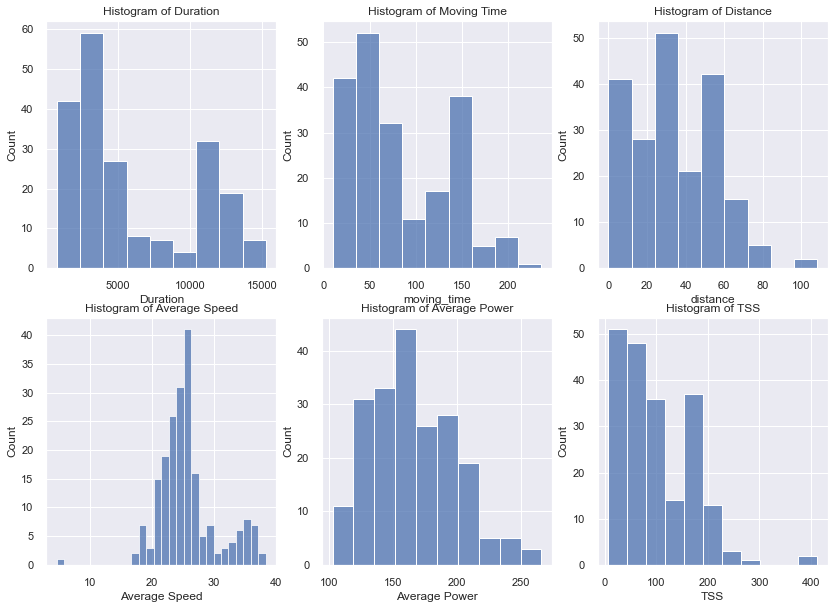

In [10]:
#explore the distributions of some key variables: time, distance, average speed, average power, TSS.
#plot multiple graphs 
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
f, axes = plt.subplots(2, 3, figsize = (14, 10))
sns.histplot(strava_cheetah['Duration'], ax=axes[0][0]).set_title('Histogram of Duration')
sns.histplot(strava_cheetah['moving_time'], ax=axes[0][1]).set_title('Histogram of Moving Time')
sns.histplot(strava_cheetah['distance'], ax=axes[0][2]).set_title('Histogram of Distance')
sns.histplot(strava_cheetah['Average Speed'], ax=axes[1][0]).set_title('Histogram of Average Speed')
sns.histplot(strava_cheetah['Average Power'], ax=axes[1][1]).set_title('Histogram of Average Power')
sns.histplot(strava_cheetah['TSS'], ax=axes[1][2]).set_title('Histogram of TSS')
plt.show()

### Analysis 1:

The histrograms above show that:

* The distribution of duration (overall duration of the ride), moving time, distance, average power and TSS (Training Stress Score) are right-skewed distributed

* The distribution of average speed is left-skewed distributed.


In [11]:
#Convert elevation_gain type from obj. to float for further calculation 

strava_cheetah['ele_gain1']=strava_cheetah['elevation_gain'].astype(str)
strava_cheetah['ele_gain2'] = strava_cheetah['ele_gain1'].str[:4]
strava_cheetah['elevation_f'] = strava_cheetah['ele_gain2'].astype(float)

drop_cols = ['elevation_gain', 'ele_gain1', 'ele_gain2']
strava_cheetah.drop(drop_cols, axis = 1, inplace = True)
strava_cheetah

<ipython-input-11-60b4b4fab2bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strava_cheetah['ele_gain1']=strava_cheetah['elevation_gain'].astype(str)
<ipython-input-11-60b4b4fab2bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strava_cheetah['ele_gain2'] = strava_cheetah['ele_gain1'].str[:4]
<ipython-input-11-60b4b4fab2bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,SC_Date,elapsed_time,Duration,moving_time,Time Moving,Elevation Gain,Average Speed,average_watts,Average Power,Nonzero Average Power,...,VAM,Calories (HR),1 sec Peak Power,1 min Peak Hr,TSS,device_watts,distance,kudos,workout_type,elevation_f
2018-01-27 19:39:49+00:00,2018-01-27,17,1053,17,1053,77.80,26.0234,153.4,153.283,191.923,...,265.983,201.970,664,143.000,20.2257,True,7.6,4,Ride,95.0
2018-01-27 20:01:32+00:00,2018-01-27,67,4062,67,4062,362.20,34.4380,187.7,186.599,231.369,...,321.004,1044.550,766,166.233,94.5787,True,38.6,19,Race,449.0
2018-02-05 21:06:42+00:00,2018-02-05,69,4151,65,3945,355.80,22.2417,165.9,163.264,225.094,...,308.571,743.167,846,161.117,98.3269,True,24.3,6,Ride,439.0
2018-02-07 06:59:05+00:00,2018-02-07,144,8659,134,8159,815.40,20.7841,151.0,148.253,204.398,...,339.005,1655.090,786,206.826,171.0780,True,47.1,10,Ride,890.0
2018-02-09 19:18:03+00:00,2018-02-09,193,11637,139,8415,513.20,25.6585,145.9,143.918,189.786,...,158.763,1659.260,784,164.617,147.7970,True,59.8,22,Ride,656.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,2019-07-19,174,10472,136,8229,500.40,25.4524,166.8,164.740,206.130,...,172.024,0.000,659,0.000,159.3630,True,58.2,16,Ride,666.0
2019-07-26 20:12:56+00:00,2019-07-26,185,11150,139,8410,482.63,25.5036,166.9,163.695,201.309,...,155.827,1613.940,894,162.817,183.1140,True,59.6,15,Ride,663.0
2019-07-27 20:42:59+00:00,2019-07-27,49,2977,47,2931,157.88,24.3316,168.4,162.109,211.475,...,190.920,573.058,703,138.783,51.1646,True,19.8,6,Ride,247.0
2019-07-27 21:47:24+00:00,2019-07-27,50,3015,50,3015,292.20,34.8044,235.2,235.153,262.684,...,348.896,761.681,755,164.567,83.5620,True,29.1,15,Race,415.0


In [12]:
#Check correlation (Note: value of 1 (or -1) The closer to 1 the better the relationship.)
SC_corr=strava_cheetah.corr()
#SC_corr


In [13]:
#Select only interesting columns from strava_cheetah to create a samller data fram 'result'
#Distance, Moving Time, Average Speed, Heart Rate, Power (watts), Normalised power (NP), 
#TSS (Training Stress Score), Elevation Gain(metres climbed over the ride)

cols = ['SC_Date', 'distance', 'moving_time', 'Average Speed', 'average_heartrate', 
        'Average Power', 'NP', 'TSS', 'elevation_f']
result = strava_cheetah[cols]

#Check correlation
result_corr=result.corr()
result_corr

,distance,moving_time,Average Speed,average_heartrate,Average Power,NP,TSS,elevation_f
distance,1.000000,0.972260,0.110461,0.078131,0.030508,0.202935,0.920085,0.838483
moving_time,0.972260,1.000000,-0.100980,-0.079929,-0.117486,0.092046,0.909389,0.854362
Average Speed,0.110461,-0.100980,1.000000,0.726858,0.738740,0.507974,0.037499,-0.052611
average_heartrate,0.078131,-0.079929,0.726858,1.000000,0.676006,0.578104,0.080077,0.051000
Average Power,0.030508,-0.117486,0.738740,0.676006,1.000000,0.761274,0.139968,-0.110101
NP,0.202935,0.092046,0.507974,0.578104,0.761274,1.000000,0.425102,0.232209
TSS,0.920085,0.909389,0.037499,0.080077,0.139968,0.425102,1.000000,0.847965
elevation_f,0.838483,0.854362,-0.052611,0.051000,-0.110101,0.232209,0.847965,1.000000


<AxesSubplot:>

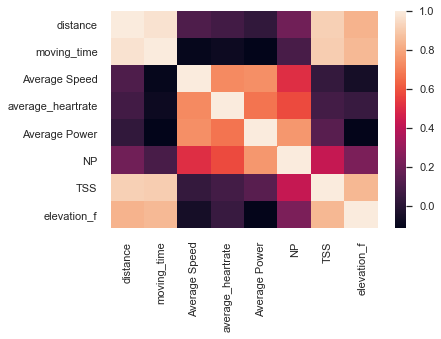

In [14]:
#plot heatmap of correlation
sns.heatmap(result_corr)


### Question 2:
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain

[Text(0, 0.5, 'Normalised power')]

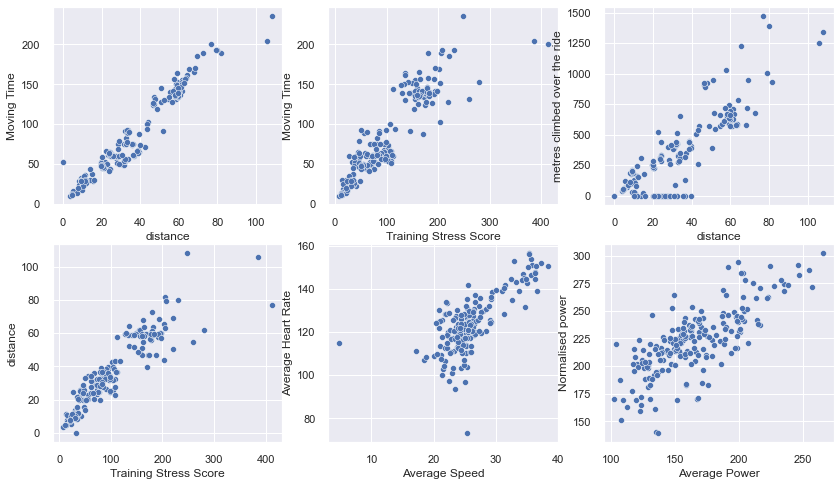

In [15]:
#scatterplot - positive correlation

f, axes = plt.subplots(2, 3, figsize = (14, 8))
f1 = sns.scatterplot(x='distance', y = 'moving_time', data = strava_cheetah, ax=axes[0][0])
f1.set(ylabel = 'Moving Time')

f2 = sns.scatterplot(x='TSS', y = 'moving_time', data = strava_cheetah, ax=axes[0][1])
f2.set(xlabel='Training Stress Score', ylabel = 'Moving Time')

f3 = sns.scatterplot(x='distance', y = 'elevation_f', data = strava_cheetah, ax=axes[0][2])
f3.set(ylabel='metres climbed over the ride')

f4=sns.scatterplot(x='TSS', y = 'distance', data = strava_cheetah, ax=axes[1][0])
f4.set(xlabel='Training Stress Score')

f5 = sns.scatterplot(x='Average Speed', y = 'average_heartrate', data = strava_cheetah, ax=axes[1][1])
f5.set(ylabel='Average Heart Rate')

f6 = sns.scatterplot(x='Average Power', y = 'NP', data = strava_cheetah, ax=axes[1][2])
f6.set(ylabel = 'Normalised power')

[Text(0.5, 0, 'Elevation Gain')]

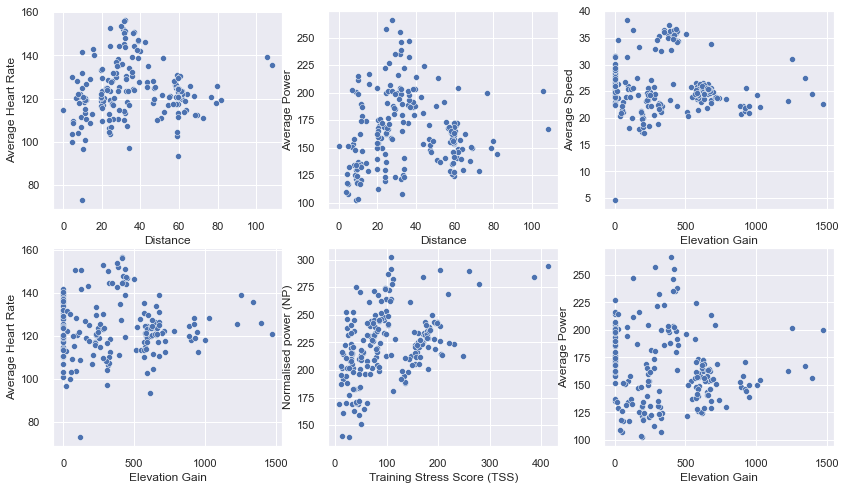

In [15]:
#scatterplot - weak/no correlation

f, axes = plt.subplots(2, 3, figsize = (14, 8))
g1 = sns.scatterplot(x='distance', y = 'average_heartrate', data = strava_cheetah, ax=axes[0][0])
g1.set(xlabel='Distance', ylabel='Average Heart Rate')

g2 = sns.scatterplot(x='distance', y = 'Average Power', data = strava_cheetah, ax=axes[0][1])
g2.set(xlabel='Distance')

g3 = sns.scatterplot(x='elevation_f', y = 'Average Speed', data = strava_cheetah, ax=axes[0][2])
g3.set(xlabel='Elevation Gain')

g4 = sns.scatterplot(x='elevation_f', y = 'average_heartrate', data = strava_cheetah, ax=axes[1][0])
g4.set(xlabel='Elevation Gain', ylabel='Average Heart Rate')

g5=sns.scatterplot(x='TSS', y = 'NP', data = strava_cheetah, ax=axes[1][1])
g5.set(xlabel='Training Stress Score (TSS)', ylabel = 'Normalised power (NP)')

g6=sns.scatterplot(x='elevation_f', y = 'Average Power', data = strava_cheetah, ax=axes[1][2])
g6.set(xlabel='Elevation Gain')

### Analysis 2:

The scatterplots above show that:

* There are positive relationships between:
    * distance and moving time (corr = 0.972260)
    * TSS and moving time (corr = 0.909389)
    * distance and elevation gain (corr = 0.838483)
    * TSS and distance (corr = 0.920085)
    * average speed and average heart rate  (corr = 0.726858)
    * average power and NP (corr = 0.761274)
    
    
* There are weak or no relationship between:
    * distance and average heart rate (corr = 0.078131)
    * distance and average power  (corr = 0.030508)
    * elevation gain and average speed (corr = -0.052611)
    * elevation gain and average heart rate (corr = 0.051000)
    * TSS and NP  (corr = 0.425102)
    * elevation gain and average power  (corr = -0.110101)

### Question 3: 
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.

#### Question 3A: 
Use scatter plots with different colours for each category to explore how these categories differ.  
    
#### Question 3B: 
Use histograms or box plots to visualise the different distributions of a variable for the three categories.
 

* In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).

[Text(0.5, 1.0, 'D. Average Power(watts) vs Normalised power')]

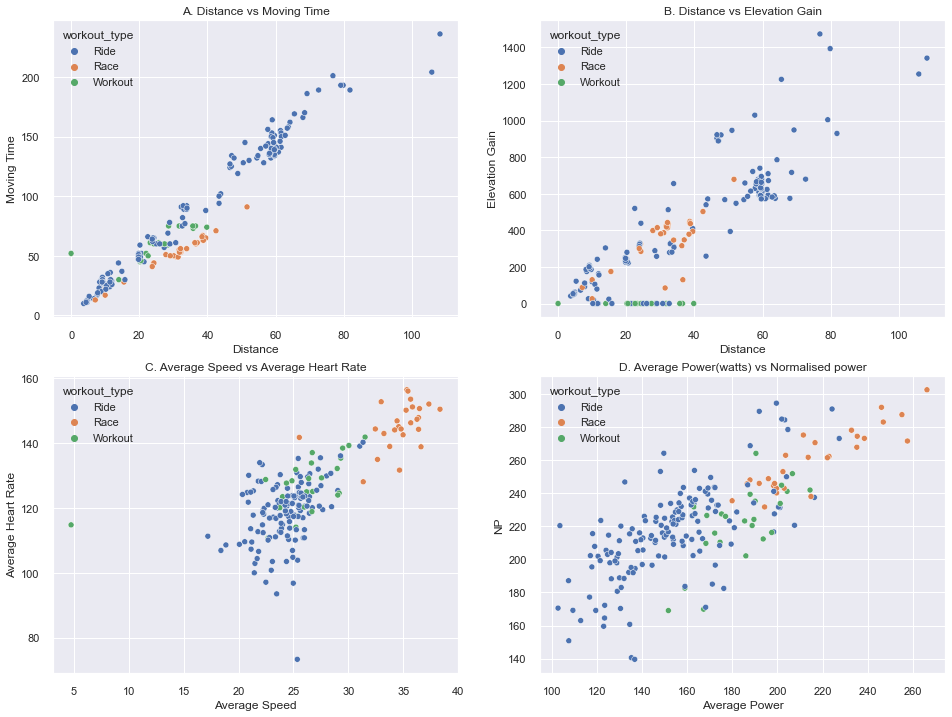

In [16]:
#Use scatter plots with different colours for each category to explore how these categories differ.

#separate into 3 graphs
#sns.relplot(x='distance', y = 'Time Moving',  col='workout_type', data = strava_cheetah)

f, axes = plt.subplots(2,2, figsize = (16, 12))
sns.scatterplot(x='distance', y = 'moving_time', hue='workout_type', data = strava_cheetah, ax=axes[0][0]).set(title = 'A. Distance vs Moving Time', xlabel='Distance', ylabel='Moving Time')
sns.scatterplot(x='distance', y = 'elevation_f', hue='workout_type', data = strava_cheetah, ax=axes[0][1]).set( title = 'B. Distance vs Elevation Gain', xlabel='Distance', ylabel='Elevation Gain')
sns.scatterplot(x='Average Speed', y = 'average_heartrate', hue='workout_type', data = strava_cheetah, ax=axes[1][0]).set(title = 'C. Average Speed vs Average Heart Rate', ylabel='Average Heart Rate')
sns.scatterplot(x='Average Power', y = 'NP', hue='workout_type', data = strava_cheetah, ax=axes[1][1]).set(title = 'D. Average Power(watts) vs Normalised power')


#### Analysis 3A: 

From the scatterplots above:

* A. Distance vs Moving Time :The categories Ride has significant higher distance and moving time compare to other categories. Race and Workout have a similar range.

* B. Distance vs Elevation Gain : People who ride has more distance and elevation gain than other categories. However, people who workout has zero elevation gain.

* C. Average Speed vs Average Heart Rate: The illustration shows that the Race categorie has the highest average speed (around 130-160) and heart rate, follow by Workout (118-142) and Ride categories (98 - 140). The majority of Average Heart rate of all categories is between 110-130.

* D. Average Power(watts) vs Normalised power : The average watts and NP of Race categorie is the hightest among others.

[Text(0.5, 1.0, 'D. Average Power vs Workout type'),
 Text(0.5, 0, 'Workout type')]

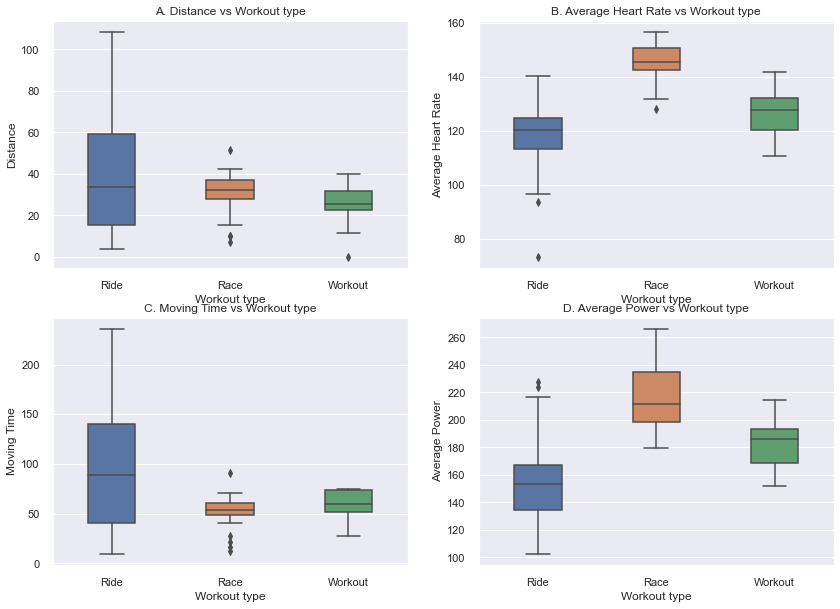

In [41]:
#Use ox plots to visualise the different distributions of a variable for the three categories.

f, axes = plt.subplots(2, 2, figsize = (14, 10))
sns.boxplot(x='workout_type', y='distance', data=strava_cheetah, width=0.4, ax=axes[0][0]).set(title = 'A. Distance vs Workout type', xlabel='Workout type', ylabel='Distance')
sns.boxplot(x='workout_type', y='average_heartrate', data=strava_cheetah, width=0.4, ax=axes[0][1]).set(title = 'B. Average Heart Rate vs Workout type', xlabel='Workout type', ylabel='Average Heart Rate')
sns.boxplot(x='workout_type', y='moving_time', data=strava_cheetah, width=0.4, ax=axes[1][0]).set(title = 'C. Moving Time vs Workout type', xlabel='Workout type', ylabel='Moving Time')
sns.boxplot(x='workout_type', y='Average Power', data=strava_cheetah, width=0.4, ax=axes[1][1]).set(title = 'D. Average Power vs Workout type', xlabel='Workout type')

#### Analysis 3B: 
* A. Distance vs Workout type: 
    The distance of Ride varies much more than the distance of Race and Workout.
    The meadian distance of Ride and Race are close at about 35. However, the meadian distance of workout is a little bit lower than others.


* B. Average Heart Rate vs Workout type: 
    Race group has the hightest average heart rate. The median is around 144, the minimum is over 130 and the maximum is almost 160 with one outlier at 128.
    Follow by workout group...The median is 130, the minimum is 110 and the maximum is about 142.
    The lowest average heart rate group is Ride..The median is 121, the minimum is 98 and the maximum is about 140 with two outliers. Additional, ride group is much more variation compared with other groups.
    
    
* C. Moving Time vs Workout type:
    The moving time of Ride varies much more than that of Race and Workout.
    The moving time of Race is the most consistent compared to other groups with many outliers.
    The maximum moving time of Workout is close to the 25% highest moving time at about 75.



* D. Average Power vs Workout type
    The Average Power of Ride varies much more than that of Race and Workout but the average power of Ride is lower than the other groups.
    Race has the highest average power with median about 210.
    The average power of Workout is the most consistent.
    

## strava-cheetah-weather
### Question 4: 

* We want to explore relationship between `rides` and `weather`. In order to carry out this analysis, you need `weather` data from relevant source. For your convenience, we have downloaded temperature data from [Bureau of Meterology](http://www.bom.gov.au/). You can find temperature under `Maximum temperature (Degree C)` column which represents maximum temperature for the day. Under the `data` directory, you get `weather_data_2018.csv` and `weather_data_2019.csv` files from where you can read daily temperatures. In order to get temperature for a day so that you can use in your combined dataframe (joining Strava and Cheetah datasets), you need to make `date` column consistent in both dataframes. 
    * Make `date` column consistent across both `weather` and `rides` datasets so that you can get `Maximum temperature` for the day of the ride. 


In [18]:
#weather_data_2018.csv
weather2018 = pd.read_csv('data/weather_data_2018.csv', skipinitialspace=True)
weather2018

#create 'Date' from  'Year', 'Month', 'Day'
weather2018['Day'] = weather2018['Day'].apply(str)
weather2018['Day'] = weather2018['Day'].str.zfill(2)
weather2018['Month'] = weather2018['Month'].apply(str)
weather2018['Month'] = weather2018['Month'].str.zfill(2)
weather2018['Year'] = weather2018['Year'].apply(str)

weather2018['Date'] = (weather2018['Year'] + '-' + weather2018['Month'] + '-' + weather2018['Day'])
weather2018['Date'] = pd.to_datetime(weather2018.Date, format='%Y-%m-%d')

#Check data type
#weather2018.dtypes
#weather2018

In [19]:
#weather_data_2019.csv
weather2019 = pd.read_csv('data/weather_data_2019.csv', skipinitialspace=True)

#create 'Date' from  'Year', 'Month', 'Day'
weather2019['Day'] = weather2019['Day'].apply(str)
weather2019['Day'] = weather2019['Day'].str.zfill(2)
weather2019['Month'] = weather2019['Month'].apply(str)
weather2019['Month'] = weather2019['Month'].str.zfill(2)
weather2019['Year'] = weather2019['Year'].apply(str)

weather2019['Date'] = (weather2019['Year'] + '-' + weather2019['Month'] + '-' + weather2019['Day'])
weather2019['Date'] = pd.to_datetime(weather2019.Date, format='%Y-%m-%d')

#weather2019
#weather2019['Date']

In [20]:
#Create dataframe 'result2018' to collect only info. that have date (SC_Date) in 2018
col = ['SC_Date', 'distance', 'Average Speed', 'workout_type']
result2018 = strava_cheetah[col]
result2018 = result2018[result2018.SC_Date <= '2018-12-31']

#result2018

In [21]:
#Create dataframe 'result2019' to collect only info. that have date (SC_Date) in 2019
result2019 = strava_cheetah[col]
result2019 = result2019[result2019.SC_Date > '2018-12-31']

#result2019

In [22]:
#Join result2018 with weather2018 to get the Maximum temperature (Degree C)
result2018_w = pd.merge(left = result2018 , right = weather2018 ,
                 left_on = ['SC_Date'], right_on = ['Date'], how = 'left')


#Join result2019 with weather2019 to get the Maximum temperature (Degree C)
result2019_w = pd.merge(left = result2019 , right = weather2019 ,
                 left_on = ['SC_Date'], right_on = ['Date'], how = 'left')

#drop unused columns
drop_cols = ['Product code', 'Bureau of Meteorology station number', 'Year', 'Month', 'Day',
             'Days of accumulation of maximum temperature', 'Quality', 'Date']
result2018_w.drop(drop_cols, axis = 1, inplace = True)
result2019_w.drop(drop_cols, axis = 1, inplace = True)

In [23]:
#Append Data 2018 x 2019
SC_weather = pd.concat([result2018_w, result2019_w] , axis=0)

SC_weather

,SC_Date,distance,Average Speed,workout_type,Maximum temperature (Degree C)
0,2018-01-27,7.6,26.0234,Ride,30.4
1,2018-01-27,38.6,34.4380,Race,30.4
2,2018-02-05,24.3,22.2417,Ride,27.4
3,2018-02-07,47.1,20.7841,Ride,28.1
4,2018-02-09,59.8,25.6585,Ride,31.9
...,...,...,...,...,...
96,2019-07-19,58.2,25.4524,Ride,20.5
97,2019-07-26,59.6,25.5036,Ride,19.0
98,2019-07-27,19.8,24.3316,Ride,20.3
99,2019-07-27,29.1,34.8044,Race,20.3


In [24]:
#Check correlation
SC_weather.corr()

,distance,Average Speed,Maximum temperature (Degree C)
distance,1.000000,0.110461,0.004929
Average Speed,0.110461,1.000000,-0.066682
Maximum temperature (Degree C),0.004929,-0.066682,1.000000


#### Question 4A: 

* Can you find any relationship between distance travelled per ride and the temperature?


[Text(0.5, 1.0, 'Distance vs Maximum temperature (Degree C)'),
 Text(0, 0.5, 'Distance')]

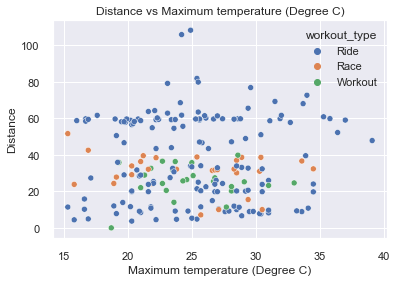

In [25]:
#distance travelled per ride and the temperature (on the three categories: Race, Workout and Ride)
sns.scatterplot(x='Maximum temperature (Degree C)', y = 'distance', hue='workout_type', data = SC_weather).set(title='Distance vs Maximum temperature (Degree C)', ylabel='Distance')


#### Analysis 4A: 

* From the scatterplot above, it can be seen that most people went to workout when the temperature is between 18 to 31 degree celsius. 
* People who ride could get more distance between 18 to 31 degree celsius.
* For people who race and workout, the distance was not affected by temperature(between 18 to 31 degree celsius)

### Question 4B: 

* Can you find any relatioship between Average speed of ride and the temperature?

[Text(0.5, 1.0, 'Average Speed vs Maximum temperature (Degree C)')]

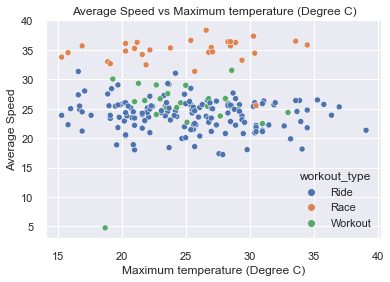

In [26]:
#Average speed of ride and the temperature (on the three categories: Race, Workout and Ride)
sns.scatterplot(x='Maximum temperature (Degree C)', y = 'Average Speed', hue='workout_type', data = SC_weather).set(title='Average Speed vs Maximum temperature (Degree C)')


#### Analysis 4B: 

* From the scatterplot above, it can be assumed that when the weather is too cold(less than 18 degree celsius) or too hot (higher than 31 degree celsius), the average of speed are decreased and there were not many people went to workout and race in this weather.

## Challenge

### Challenge 1:
* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

In [27]:
SC_corr.corr().loc['kudos']

elapsed_time             0.828860
Duration                 0.829014
moving_time              0.825497
Time Moving              0.825603
Elevation Gain           0.821623
Average Speed           -0.339008
average_watts           -0.389412
Average Power           -0.394986
Nonzero Average Power   -0.085838
NP                      -0.076628
average_heartrate       -0.450602
Average Heart Rate      -0.410920
Average Cadence         -0.516003
average_temp            -0.119799
Average Temp             0.290642
VAM                      0.279105
Calories (HR)            0.756821
1 sec Peak Power         0.652198
1 min Peak Hr           -0.281663
TSS                      0.882004
distance                 0.874605
kudos                    1.000000
elevation_f              0.839927
Name: kudos, dtype: float64

In [150]:
#f, axes = plt.subplots(2, 2, figsize = (14, 12))
#sns.scatterplot(x='moving_time', y = 'kudos', data = strava_cheetah, ax=axes[0][0])
#sns.scatterplot(x='Calories (HR)', y = 'kudos', data = strava_cheetah, ax=axes[0][1])
#sns.scatterplot(x='distance', y = 'kudos', data = strava_cheetah, ax=axes[1][0])
#sns.scatterplot(x='TSS', y = 'kudos', data = strava_cheetah, ax=axes[1][1])


[Text(0.5, 1.0, 'D. Time Moving vs Kudos'), Text(0.5, 0, 'Workout type')]

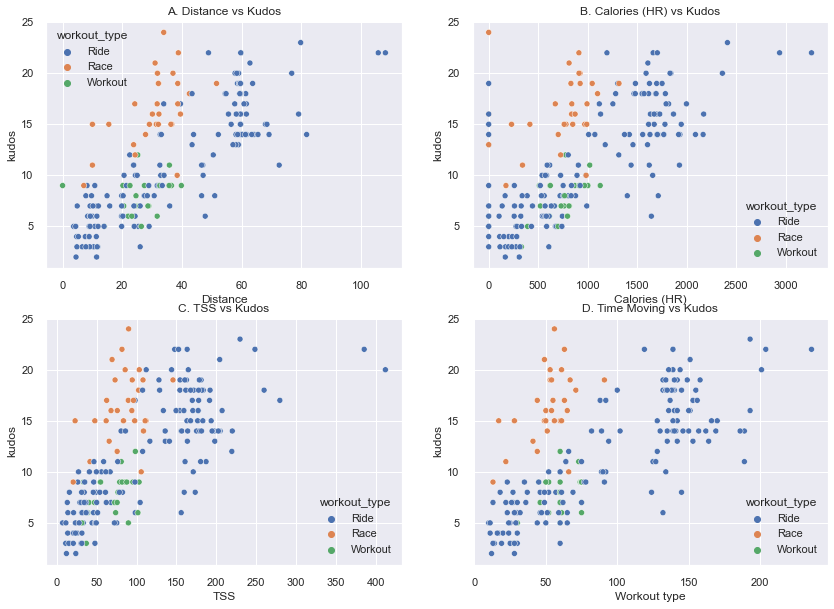

In [28]:
f, axes = plt.subplots(2, 2, figsize = (14, 10))

sns.scatterplot(x='distance', y = 'kudos', hue='workout_type', data = strava_cheetah, ax=axes[0][0]).set(title = 'A. Distance vs Kudos', xlabel='Distance')
sns.scatterplot(x='Calories (HR)', y = 'kudos', hue='workout_type', data = strava_cheetah, ax=axes[0][1]).set(title = 'B. Calories (HR) vs Kudos')
sns.scatterplot(x='TSS', y = 'kudos', hue='workout_type', data = strava_cheetah, ax=axes[1][0]).set(title = 'C. TSS vs Kudos')
sns.scatterplot(x='moving_time', y = 'kudos', hue='workout_type', data = strava_cheetah, ax=axes[1][1]).set(title = 'D. Time Moving vs Kudos', xlabel='Workout type')

#### Analysis challenge 1:
   * In generally, Race is the most popular even when they gian a small value in each main variables above.
   * From the relationship between the main variables (distance, Calories (HR), TSS and moving time) and kudos, the more varibles' value increase, the more kudos they get.
    

In [80]:
#Create dataframe 'result_sum' to collect only date, distance and TSS
col = ['SC_Date', 'distance', 'TSS']
result_sum = strava_cheetah[col]
result_sum.set_index('SC_Date', inplace = True)

#Create dataframe 'result_av' to collect only date and Average Speed
col = ['SC_Date', 'Average Speed']
result_av = strava_cheetah[col]
result_av.set_index('SC_Date', inplace = True)

#result_av 
#result_sum

In [105]:
#Create df 'monthly_sum' to summarize monthly data
monthly_sum=result_sum.resample('1m').sum()
#monthly_sum


In [106]:
#Create df 'monthly_av' to average of monthly data
monthly_av=result_av.resample('1m').mean()
#monthly_av

In [45]:
#Inner Join monthly_sum and monthly_av
monthly = monthly_sum.join(monthly_av, how="inner")
#monthly

### Challenge 2:

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

Text(0.5, 1.0, 'Overall Summary of Activity')

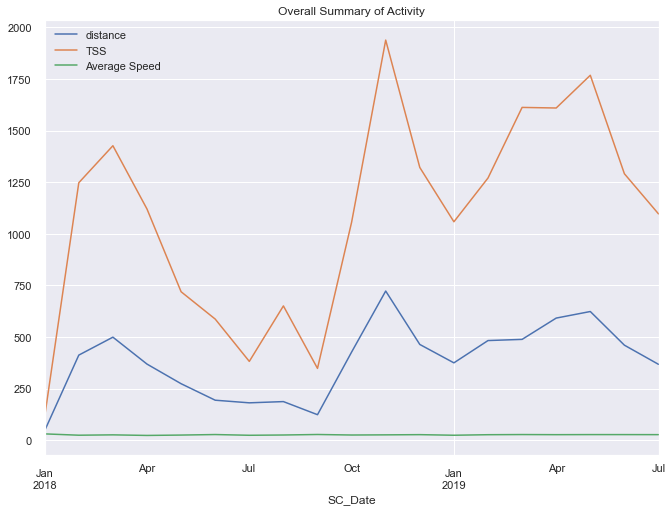

In [102]:
#plot monthly data to generate an overall summary of activity
ax = monthly.plot(grid=True, figsize=(11,8))
plt.title('Overall Summary of Activity')


### Analysis Challenge 2:

* Distance and TSS have similar trend over the period of Jan-2018 to Jul-2019. There are three major peaks; the hightest distance and TSS peak is in Nov-2018, follow by May-2019 and Mar-2018. For the average speed of each month remains stable at aproximatly 26 over the stated period.

### Challenge 3:

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.


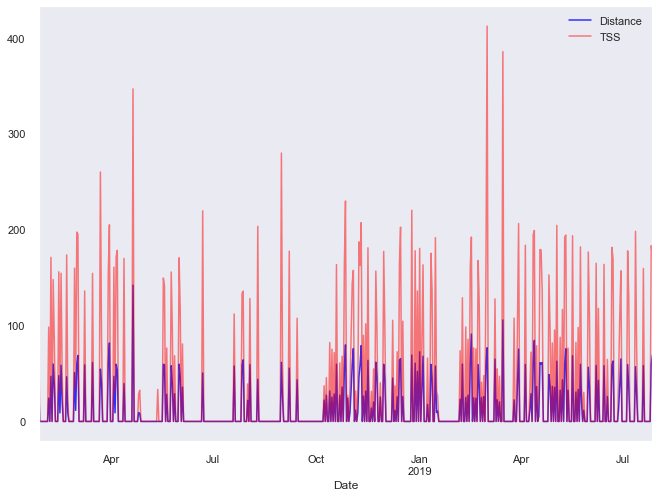

In [79]:
#Daily summary of distance and TSS
start, end = '2018-1', '2019-12'
result_sum.distance.loc[start:end].resample('1d').sum().plot(figsize=(11,8), label='Distance', markersize=2, c='blue', alpha = 0.8)
result_sum.TSS.loc[start:end].resample('1d').sum().plot(label='TSS', markersize=5, c='red', alpha = 0.5)
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show()
